In [1]:
# setup
#from mlwpy import *

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

#%reload_ext memory_profiler

In [2]:
cars_data =  pd.read_csv('Span_new.csv')
cars_data.head()

,Unnamed: 0,ID,make,model,months_old,power,gear,fuel_type,kms,price,age
0,0,97860,Porsche,911,240,210,manual,gasoline,202000,999999,1998
1,1,27821,Ford,Mustang,54,487,manual,gasoline,30000,685000,2013
2,2,97801,Porsche,911,358,220,manual,gasoline,56300,555555,1988
3,3,98251,Porsche,911,14,368,manual,gasoline,2800,470000,2016
4,4,98250,Porsche,911,3,515,unknown,gasoline,10,450000,2017


In [3]:
cars_data = cars_data.drop_duplicates()
cars_data = cars_data.dropna()
cars_data = cars_data.drop(['Unnamed: 0', 'ID'], axis = 1)
cars_data = cars_data.rename({'age' : 'model_year'}, axis = 1)
cars_data.shape

(92385, 9)

### Standardizing IVs and DV

In [4]:
variables_in_study = cars_data[['months_old', 'power','kms','price']]

scaler = StandardScaler()
scaler.fit(variables_in_study)
variables_in_study = scaler.transform(variables_in_study)

variables_in_study = pd.DataFrame(variables_in_study, columns = ['months_old', 'power','kms','price'])
independent_variables = variables_in_study[['months_old', 'power','kms']]
dependent_variable = variables_in_study['price']

In [5]:
variables_in_study.head()

,months_old,power,kms,price
0,3.098538,2.577409,1.579643,63.172076
1,-0.171992,9.057070,-0.706650,42.938830
2,5.173390,2.811332,-0.357060,34.624224
3,-0.875332,6.273389,-1.068204,29.128793
4,-1.068750,9.712054,-1.105290,27.844138


In [6]:
independent_variables.head()

,months_old,power,kms
0,3.098538,2.577409,1.579643
1,-0.171992,9.057070,-0.706650
2,5.173390,2.811332,-0.357060
3,-0.875332,6.273389,-1.068204
4,-1.068750,9.712054,-1.105290


In [7]:
dependent_variable.head()

0    63.172076
1    42.938830
2    34.624224
3    29.128793
4    27.844138
Name: price, dtype: float64

In [8]:
x_train, x_test, y_train, y_test = train_test_split(independent_variables, dependent_variable, test_size=0.2)

In [9]:
print('cars_data shape is: ', cars_data.shape)
print('x_train shape is: ',x_train.shape)
print('x_test shape is: ',x_test.shape)
print('y_train shape is: ',y_train.shape)
print('y_test shape is: ',y_test.shape)

cars_data shape is:  (92385, 9)
x_train shape is:  (73908, 3)
x_test shape is:  (18477, 3)
y_train shape is:  (73908,)
y_test shape is:  (18477,)


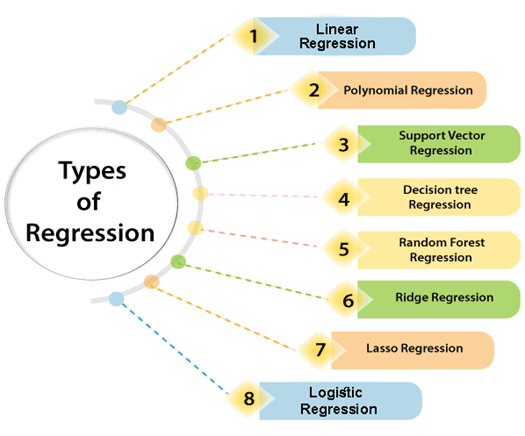

### Model Evaluation

In [10]:
MAE_list=[]
MSE_list=[]
RMSE_list=[]
R_Squared_list=[]


def model_evaluation(y_test, predictions):
    mae = metrics.mean_absolute_error(y_test, predictions)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse) # or mse**(0.5)  
    r2 = metrics.r2_score(y_test,predictions)
    
    MAE_list.append(mae)
    MSE_list.append(mse)
    RMSE_list.append(rmse)
    R_Squared_list.append(r2)
    
    print("Results of sklearn.metrics: \n")
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-Squared:", r2)

### Multiple Linear Regression

In [11]:
regression_model = sm.OLS(y_train, x_train)
results = regression_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.627
Model:                            OLS   Adj. R-squared (uncentered):              0.627
Method:                 Least Squares   F-statistic:                          4.145e+04
Date:                Fri, 15 Apr 2022   Prob (F-statistic):                        0.00
Time:                        04:55:28   Log-Likelihood:                         -68023.
No. Observations:               73908   AIC:                                  1.361e+05
Df Residuals:                   73905   BIC:                                  1.361e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
months_old    -0.2106      0.004    -58.327      0.000      -0.218      -0.204
power          0.7001      0.002    311.901      0.000       0.696       0.705
kms           -0.2360      0.004    -65.280      0.000      -0.243      -0.229
==============================================================================
Omnibus:                   167593.441   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       8445245539.007
Skew:                          20.816   Prob(JB):                         0.00
Kurtosis:                    1658.498   Cond. No.                         2.90
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
print(results.rsquared)
print(results.rsquared_adj)
print(results.pvalues)
print(results.params)

0.627196473786758
0.627181340702682
months_old    0.0
power         0.0
kms           0.0
dtype: float64
months_old   -0.210611
power         0.700115
kms          -0.236013
dtype: float64


In [13]:
predictions = results.predict(x_test)

In [14]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.3056581889751271
MSE: 0.4128316274119322
RMSE: 0.6425197486551929
R-Squared: 0.6036105814307018


### Polynomial Regression

Also see how to visualize it

In [15]:
poly_reg = PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(x_train)
poly_reg.fit(x_poly,y_train)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_train)

LinearRegression()

In [16]:
predictions = lin_reg.predict(poly_reg.fit_transform(x_test))

In [17]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.21904505440703917
MSE: 0.27445931794855816
RMSE: 0.5238886503337882
R-Squared: 0.7364718150482221


### Support Vector Regression

In [18]:
%%timeit -n1 -r1

from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)
predictions = svr.predict(x_test)

2min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [19]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.21904505440703917
MSE: 0.27445931794855816
RMSE: 0.5238886503337882
R-Squared: 0.7364718150482221


### Decision Tree Regression

In [20]:
%%timeit -n1 -r1

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
predictions = dtr.predict(x_test)

184 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [21]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.21904505440703917
MSE: 0.27445931794855816
RMSE: 0.5238886503337882
R-Squared: 0.7364718150482221


### Random Forest Regression

In [22]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
predictions = rfr.predict(x_test)

In [23]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.1793575191140655
MSE: 0.25559772711090684
RMSE: 0.5055667385330119
R-Squared: 0.754582188694494


### Ridge Regression

In [24]:
rdg = Ridge(alpha = 0.5)
rdg = rdg.fit(x_train, y_train)
predictions = rdg.predict(x_test)

In [25]:
print(rdg.score(x_train, y_train))
print(rdg.coef_)
print(rdg.intercept_)

0.627195952344568
[-0.21061063  0.70011081 -0.2360122 ]
0.0002597213043906326


In [26]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.30568790954026803
MSE: 0.41283225512236627
RMSE: 0.6425202371306029
R-Squared: 0.6036099787206439


### Lasso Regression

In [27]:
lasso = Lasso(alpha=0.01)
lasso = lasso.fit(x_train, y_train) 
prediction = lasso.predict(x_test)

In [28]:
print(lasso.score(x_train, y_train))
print(lasso.coef_)
print(lasso.intercept_)

0.6269635957718063
[-0.20483271  0.68918967 -0.22970679]
0.00023190806852511816


In [29]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.30568790954026803
MSE: 0.41283225512236627
RMSE: 0.6425202371306029
R-Squared: 0.6036099787206439


### KNN Regression

In [30]:
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
fit = knn.fit(x_train, y_train)
predictions = fit.predict(x_test)

In [31]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.200916186957772
MSE: 0.28960845992820206
RMSE: 0.5381528220944326
R-Squared: 0.7219260312894042


### Model Comparison

In [32]:
models_list = ['Multiple Linear Regression', 'Polynomial Regression', 'Support Vector Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Ridge Regression', 'Lasso Regression', 'KNN Regression' ]
#models_list = ['Multiple Linear Regression', 'Polynomial Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Ridge Regression', 'Lasso Regression', 'KNN Regression' ]

models_list

['Multiple Linear Regression',
 'Polynomial Regression',
 'Support Vector Regression',
 'Decision Tree Regression',
 'Random Forest Regression',
 'Ridge Regression',
 'Lasso Regression',
 'KNN Regression']

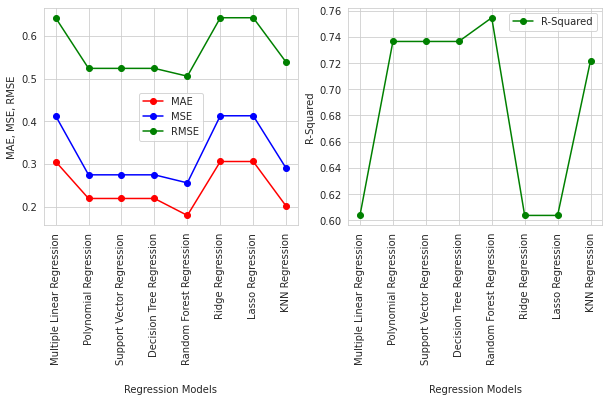

In [33]:
sns.set_style('whitegrid')

fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,4));
ax1.plot(MAE_list,color='red', label='MAE', marker="o")
ax1.plot(MSE_list, color='blue', label='MSE', marker="o")
ax1.plot(RMSE_list,color='green', label='RMSE', marker="o")
ax2.plot(R_Squared_list,  color='green', label='R-Squared', marker="o")
ax1.legend()
ax2.legend()
ax1.set_xticks(ticks=range(len(MAE_list)))
ax2.set_xticks(ticks=range(len(R_Squared_list)))
ax1.set_xticklabels(models_list, rotation=90)
ax2.set_xticklabels(models_list, rotation=90)
ax1.set_xlabel('Regression Models', labelpad=20)
ax2.set_xlabel('Regression Models', labelpad=20)
ax1.set_ylabel('MAE, MSE, RMSE')
ax2.set_ylabel('R-Squared')
plt.show()

# for index, value in enumerate(accuracy_score_list):
#     plt.text(index, value+0.020, "%.3f" %value, ha="center")

In [34]:
print(np.min(RMSE_list))
print(np.argmin(RMSE_list))
print(models_list[np.argmin(RMSE_list)])

0.5055667385330119
4
Random Forest Regression


In [35]:
print(np.max(R_Squared_list))
print(np.argmax(R_Squared_list))
print(models_list[np.argmax(R_Squared_list)])

0.754582188694494
4
Random Forest Regression
